<a href="https://colab.research.google.com/github/ArunaAcharya/Data-Science/blob/main/getting_started_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [302]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [26]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [49]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):


    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    

In [152]:
df = pd.DataFrame()

df["reviews"] = reviews
df['reviews']= df['reviews'].str.lstrip("✅ Trip Not Verified ")
df['reviews']= df['reviews'].str.lstrip("|")
df.index += 1 

df.head()



,reviews
1,Vancouver to Delhi via London. We were booke...
2,Old A320 with narrow pitch. Flight perfectly...
3,Another BA Shambles. Started off well with e...
4,BA cancelled my flight home to Heathrow on D...
5,"BA cancelled my flight home, the last flight..."


In [153]:
df.reset_index().rename(columns={'index':'id'})

,id,reviews
0,1,Vancouver to Delhi via London. We were booke...
1,2,Old A320 with narrow pitch. Flight perfectly...
2,3,Another BA Shambles. Started off well with e...
3,4,BA cancelled my flight home to Heathrow on D...
4,5,"BA cancelled my flight home, the last flight..."
...,...,...
995,996,Tampa to Gatwick. I am a disabled traveller ...
996,997,"Heathrow to Keflavik. I had booked economy, ..."
997,998,London to Muscat first class. First time try...
998,999,My family and I travelled from Cape Town to ...


In [158]:
df['id']= df.index
df.head()


,reviews,id
1,Vancouver to Delhi via London. We were booke...,1
2,Old A320 with narrow pitch. Flight perfectly...,2
3,Another BA Shambles. Started off well with e...,3
4,BA cancelled my flight home to Heathrow on D...,4
5,"BA cancelled my flight home, the last flight...",5


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

NLTK


In [84]:
example= df['reviews'][10]
print(example)

  Seat horribly narrow; 3-4-3 on a 777. Thankfully the flight was only a quarter full so was able to stretch out. Food and beverage service was good and it was great having a proper beer not a cup of froth that overflows! Cabin crew very good. Booked as a BA ticket that included travel on Qatar Airways as well.


In [85]:
tokens= nltk.wordpunct_tokenize(example)
tokens[:10]

['Seat', 'horribly', 'narrow', ';', '3', '-', '4', '-', '3', 'on']

In [86]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('Seat', 'NN'),
 ('horribly', 'RB'),
 ('narrow', 'JJ'),
 (';', ':'),
 ('3', 'CD'),
 ('-', ':'),
 ('4', 'CD'),
 ('-', ':'),
 ('3', 'CD'),
 ('on', 'IN')]

In [87]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Seat/NN)
  horribly/RB
  narrow/JJ
  ;/:
  3/CD
  -/:
  4/CD
  -/:
  3/CD
  on/IN
  a/DT
  777/CD
  ./.
  Thankfully/RB
  the/DT
  flight/NN
  was/VBD
  only/RB
  a/DT
  quarter/NN
  full/JJ
  so/RB
  was/VBD
  able/JJ
  to/TO
  stretch/VB
  out/RP
  ./.
  (PERSON Food/NN)
  and/CC
  beverage/NN
  service/NN
  was/VBD
  good/JJ
  and/CC
  it/PRP
  was/VBD
  great/JJ
  having/VBG
  a/DT
  proper/JJ
  beer/NN
  not/RB
  a/DT
  cup/NN
  of/IN
  froth/NN
  that/WDT
  overflows/VBZ
  !/.
  (PERSON Cabin/NNP)
  crew/VBD
  very/RB
  good/JJ
  ./.
  Booked/VBN
  as/IN
  a/DT
  BA/NNP
  ticket/NN
  that/WDT
  included/VBD
  travel/NN
  on/IN
  (ORGANIZATION Qatar/NNP Airways/NNP)
  as/RB
  well/RB
  ./.)


In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [32]:
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores(example)

{'neg': 0.051, 'neu': 0.722, 'pos': 0.227, 'compound': 0.8932}

Run the polarity score on the entire dataset


In [106]:
res={}
for i, row in tqdm(df.iterrows(), total= len(df)):
  text= row['reviews'] 
  myid=row['id']
  res[myid]= sia.polarity_scores(text)

 

  0%|          | 0/1000 [00:00<?, ?it/s]

In [184]:
vaders= pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index':'id'})
vaders['id']= vaders.index


In [185]:
df.head()


,reviews,id
1,Vancouver to Delhi via London. We were booke...,1
2,Old A320 with narrow pitch. Flight perfectly...,2
3,Another BA Shambles. Started off well with e...,3
4,BA cancelled my flight home to Heathrow on D...,4
5,"BA cancelled my flight home, the last flight...",5


In [254]:


vaders.head()

,neg,neu,pos,compound,id
1,0.1,0.8,0.0,-1.0,1
2,0.0,0.7,0.3,0.9,2
3,0.1,0.7,0.2,0.9,3
4,0.2,0.8,0.0,-1.0,4
5,0.1,0.8,0.1,-0.8,5


In [274]:
merged_df= pd.merge(df, vaders, how= "left", right_on= 'id', left_on="id")

In [275]:
merged_df.head()

,reviews,id,neg,neu,pos,compound
0,Vancouver to Delhi via London. We were booke...,1,0.1,0.8,0.0,-1.0
1,Old A320 with narrow pitch. Flight perfectly...,2,0.0,0.7,0.3,0.9
2,Another BA Shambles. Started off well with e...,3,0.1,0.7,0.2,0.9
3,BA cancelled my flight home to Heathrow on D...,4,0.2,0.8,0.0,-1.0
4,"BA cancelled my flight home, the last flight...",5,0.1,0.8,0.1,-0.8


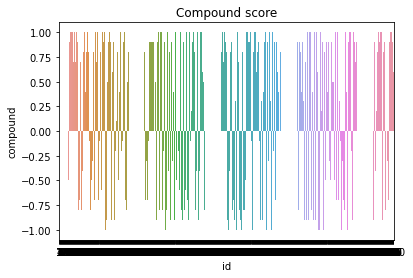

In [258]:
ax= sns.barplot(data= merged_df, x= 'id', y= 'compound')
ax.set_title("Compound score")
plt.show()

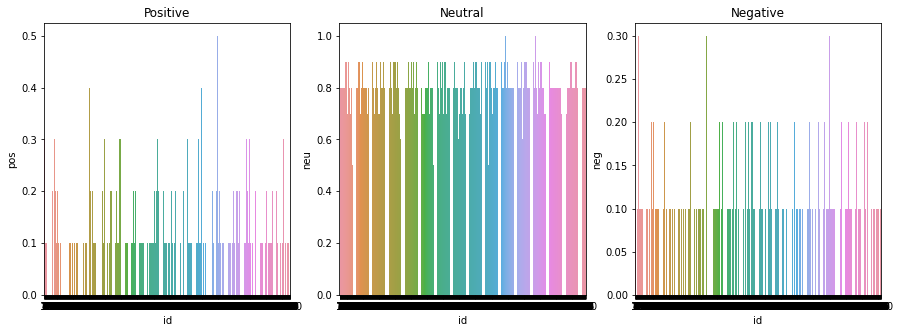

In [259]:
fig, axs= plt.subplots(1, 3, figsize= (15, 5))
sns.barplot(data= merged_df, x= 'id', y='pos', ax= axs[0])
sns.barplot(data= merged_df, x= 'id', y='neu', ax= axs[1])
sns.barplot(data= merged_df, x= 'id', y='neg', ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


In [285]:
merged_df['status']='neutral'

In [286]:
merged_df.head()

,reviews,id,neg,neu,pos,compound,status
0,Vancouver to Delhi via London. We were booke...,1,0.1,0.8,0.0,-1.0,neutral
1,Old A320 with narrow pitch. Flight perfectly...,2,0.0,0.7,0.3,0.9,neutral
2,Another BA Shambles. Started off well with e...,3,0.1,0.7,0.2,0.9,neutral
3,BA cancelled my flight home to Heathrow on D...,4,0.2,0.8,0.0,-1.0,neutral
4,"BA cancelled my flight home, the last flight...",5,0.1,0.8,0.1,-0.8,neutral


In [287]:
merged_df.loc[merged_df['compound']< 0, 'status']= 'negative'
merged_df.head()

,reviews,id,neg,neu,pos,compound,status
0,Vancouver to Delhi via London. We were booke...,1,0.1,0.8,0.0,-1.0,negative
1,Old A320 with narrow pitch. Flight perfectly...,2,0.0,0.7,0.3,0.9,neutral
2,Another BA Shambles. Started off well with e...,3,0.1,0.7,0.2,0.9,neutral
3,BA cancelled my flight home to Heathrow on D...,4,0.2,0.8,0.0,-1.0,negative
4,"BA cancelled my flight home, the last flight...",5,0.1,0.8,0.1,-0.8,negative


In [291]:
merged_df.loc[merged_df['compound']> 0.5, 'status']= 'positive'


In [318]:
reviews_feedback= merged_df.groupby(by= 'status').count().reviews
print(reviews_feedback)

status
negative    450
neutral     103
positive    447
Name: reviews, dtype: int64


In [345]:
fig= px.bar(x= reviews_feedback.index,
            y= reviews_feedback.values,
            title= "Reviews by category",

)
fig.update_layout(xaxis_title= "Reviews",
                  yaxis_title= "Number of Reviews")

fig.show()